In [2]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [3]:
train_images = np.load("task7_X_train.npy")
train_labels = np.load("task7_y_train.npy")
test_images = np.load("task7_X_test.npy")
test_labels = np.load("task7_y_test.npy")

FileNotFoundError: [Errno 2] No such file or directory: 'task7_X_train.npy'

In [3]:
print(train_images.shape)
print(train_images.dtype)
print(train_images.min())
print(train_images.max())

(4138, 224, 224, 3)
float32
-123.68
151.061


In [4]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = (train_images + 123.68)/274.75, (test_images + 123.68)/274.75

In [5]:
print(train_images.shape)
print(train_images.dtype)
print(train_images.min())
print(train_images.max())

(4138, 224, 224, 3)
float32
0.0
0.9999672


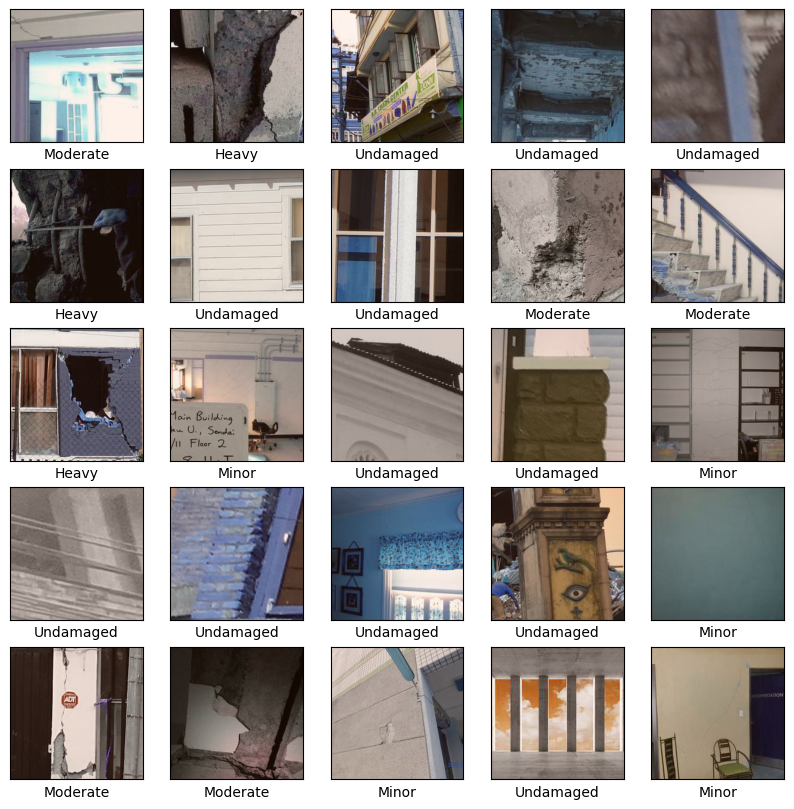

In [6]:
import random

# verify dataset
label_names = ["Heavy", "Minor", "Moderate", "Undamaged"]

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    rand_int = random.randrange(len(train_images))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[rand_int])
    # get label index to convert into label name
    label_index = 0
    for j in range(len(train_labels[rand_int])):
        if train_labels[rand_int][j] == 1:
            label_index = j
            break
    plt.xlabel(label_names[j])

plt.show()

In [13]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [14]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 64)        36928     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 26, 26, 64)       

In [15]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(4))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 64)        36928     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 26, 26, 64)       

In [18]:
print(train_images.shape)
print(train_labels.shape)

(4138, 224, 224, 3)
(4138, 4)


In [19]:
# change format of labels
new_train_labels = np.zeros((4138, 1))
for i in range(len(train_labels)):
    for j in range(len(train_labels[i])):
        if train_labels[i][j] == 1:
            new_train_labels[i] = j
            break

In [16]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))


Epoch 1/10




InvalidArgumentError: Graph execution error:

Detected at node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "c:\Users\nipun\anaconda3\envs\segmentation\lib\runpy.py", line 197, in _run_module_as_main

  File "c:\Users\nipun\anaconda3\envs\segmentation\lib\runpy.py", line 87, in _run_code

  File "c:\Users\nipun\anaconda3\envs\segmentation\lib\site-packages\ipykernel_launcher.py", line 17, in <module>

  File "c:\Users\nipun\anaconda3\envs\segmentation\lib\site-packages\traitlets\config\application.py", line 1077, in launch_instance

  File "c:\Users\nipun\anaconda3\envs\segmentation\lib\site-packages\ipykernel\kernelapp.py", line 737, in start

  File "c:\Users\nipun\anaconda3\envs\segmentation\lib\site-packages\tornado\platform\asyncio.py", line 195, in start

  File "c:\Users\nipun\anaconda3\envs\segmentation\lib\asyncio\base_events.py", line 601, in run_forever

  File "c:\Users\nipun\anaconda3\envs\segmentation\lib\asyncio\base_events.py", line 1905, in _run_once

  File "c:\Users\nipun\anaconda3\envs\segmentation\lib\asyncio\events.py", line 80, in _run

  File "c:\Users\nipun\anaconda3\envs\segmentation\lib\site-packages\ipykernel\kernelbase.py", line 524, in dispatch_queue

  File "c:\Users\nipun\anaconda3\envs\segmentation\lib\site-packages\ipykernel\kernelbase.py", line 513, in process_one

  File "c:\Users\nipun\anaconda3\envs\segmentation\lib\site-packages\ipykernel\kernelbase.py", line 418, in dispatch_shell

  File "c:\Users\nipun\anaconda3\envs\segmentation\lib\site-packages\ipykernel\kernelbase.py", line 758, in execute_request

  File "c:\Users\nipun\anaconda3\envs\segmentation\lib\site-packages\ipykernel\ipkernel.py", line 426, in do_execute

  File "c:\Users\nipun\anaconda3\envs\segmentation\lib\site-packages\ipykernel\zmqshell.py", line 549, in run_cell

  File "c:\Users\nipun\anaconda3\envs\segmentation\lib\site-packages\IPython\core\interactiveshell.py", line 3048, in run_cell

  File "c:\Users\nipun\anaconda3\envs\segmentation\lib\site-packages\IPython\core\interactiveshell.py", line 3103, in _run_cell

  File "c:\Users\nipun\anaconda3\envs\segmentation\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "c:\Users\nipun\anaconda3\envs\segmentation\lib\site-packages\IPython\core\interactiveshell.py", line 3308, in run_cell_async

  File "c:\Users\nipun\anaconda3\envs\segmentation\lib\site-packages\IPython\core\interactiveshell.py", line 3490, in run_ast_nodes

  File "c:\Users\nipun\anaconda3\envs\segmentation\lib\site-packages\IPython\core\interactiveshell.py", line 3550, in run_code

  File "C:\Users\nipun\AppData\Local\Temp\ipykernel_25720\2044530536.py", line 5, in <module>

  File "c:\Users\nipun\anaconda3\envs\segmentation\lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "c:\Users\nipun\anaconda3\envs\segmentation\lib\site-packages\keras\src\engine\training.py", line 1807, in fit

  File "c:\Users\nipun\anaconda3\envs\segmentation\lib\site-packages\keras\src\engine\training.py", line 1401, in train_function

  File "c:\Users\nipun\anaconda3\envs\segmentation\lib\site-packages\keras\src\engine\training.py", line 1384, in step_function

  File "c:\Users\nipun\anaconda3\envs\segmentation\lib\site-packages\keras\src\engine\training.py", line 1373, in run_step

  File "c:\Users\nipun\anaconda3\envs\segmentation\lib\site-packages\keras\src\engine\training.py", line 1151, in train_step

  File "c:\Users\nipun\anaconda3\envs\segmentation\lib\site-packages\keras\src\engine\training.py", line 1209, in compute_loss

  File "c:\Users\nipun\anaconda3\envs\segmentation\lib\site-packages\keras\src\engine\compile_utils.py", line 277, in __call__

  File "c:\Users\nipun\anaconda3\envs\segmentation\lib\site-packages\keras\src\losses.py", line 143, in __call__

  File "c:\Users\nipun\anaconda3\envs\segmentation\lib\site-packages\keras\src\losses.py", line 270, in call

  File "c:\Users\nipun\anaconda3\envs\segmentation\lib\site-packages\keras\src\losses.py", line 2454, in sparse_categorical_crossentropy

  File "c:\Users\nipun\anaconda3\envs\segmentation\lib\site-packages\keras\src\backend.py", line 5775, in sparse_categorical_crossentropy

logits and labels must have the same first dimension, got logits shape [32,4] and labels shape [128]
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_1996]